In [9]:
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd 
import numpy as np

import warnings
warnings.filterwarnings('ignore')

from tensorflow import keras
from keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout,Flatten,Dense
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.utils  import image_dataset_from_directory 
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras .preprocessing import image_dataset_from_directory 

import os
import matplotlib.image as mping

In [10]:
path = os.path.join("D:\\learn\\python\\learn_ml\\dog_cat\\input\\train_frames\\train")

classes = os.listdir(path=path)
print(classes)


['cat', 'dog']


In [11]:

fig = plt.gcf()
fig.set_size_inches(16, 16)
cat_dir = os.path.join(r'D:\\learn\\python\\learn_ml\\dog_cat\\input\\train_masks\\train\\cat')
dog_dir = os.path.join(r'D:\\learn\\python\\learn_ml\\dog_cat\\input\\train_masks\\train\\dog')

cat_names = os.listdir(cat_dir)
dog_names = os.listdir(dog_dir)
# print(cat_names)
# print(dog_names)
pic_index = 210

<Figure size 1600x1600 with 0 Axes>

In [12]:
cat_images = []
dog_images = []

# cat_images = [os.path.join(cat_dir, fname) for fname in os.listdir(cat_dir)[:8]]
# dog_images = [os.path.join(dog_dir, fname) for fname in os.listdir(dog_dir)[:8]]
        
# print(cat_images)
# print(dog_images)
# for i, img_path in enumerate(cat_images + dog_images):
#     plt.subplot(4, 4, i + 1)
#     plt.axis('off')
#     img = mping.imread(img_path)
#     plt.imshow(img)

# plt.show()


In [13]:

base_dir = path

# Create datasets 
train_datagen = image_dataset_from_directory(base_dir, 
												image_size=(200,200), 
												subset='training', 
												seed = 1, 
												validation_split=0.1, 
												batch_size= 32) 
test_datagen = image_dataset_from_directory(base_dir, 
												image_size=(200,200), 
												subset='validation', 
												seed = 1, 
												validation_split=0.1, 
												batch_size= 32)



Found 64 files belonging to 2 classes.
Using 58 files for training.
Found 64 files belonging to 2 classes.
Using 6 files for validation.


In [14]:
model = tf.keras.models.Sequential([ 
	layers.Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)), 
	layers.MaxPooling2D(2, 2), 
	layers.Conv2D(64, (3, 3), activation='relu'), 
	layers.MaxPooling2D(2, 2), 
	layers.Conv2D(64, (3, 3), activation='relu'), 
	layers.MaxPooling2D(2, 2), 
	layers.Conv2D(64, (3, 3), activation='relu'), 
	layers.MaxPooling2D(2, 2), 

	layers.Flatten(), 
	layers.Dense(512, activation='relu'), 
	layers.BatchNormalization(), 
	layers.Dense(512, activation='relu'), 
	layers.Dropout(0.1), 
	layers.BatchNormalization(), 
	layers.Dense(512, activation='relu'), 
	layers.Dropout(0.2), 
	layers.BatchNormalization(), 
	layers.Dense(1, activation='sigmoid') 
]) 

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 99, 99, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 46, 46, 64)        36928     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 23, 23, 64)      

Epoch 1/10
2/2 [==============================] - 6s 1s/step - loss: 0.9218 - accuracy: 0.6034 - val_loss: 8.6355 - val_accuracy: 0.6667
Epoch 2/10
2/2 [==============================] - 2s 848ms/step - loss: 0.7194 - accuracy: 0.7586 - val_loss: 1.7735 - val_accuracy: 0.6667
Epoch 3/10
2/2 [==============================] - 2s 766ms/step - loss: 0.4615 - accuracy: 0.7931 - val_loss: 6.1397 - val_accuracy: 0.6667
Epoch 4/10
2/2 [==============================] - 2s 897ms/step - loss: 0.5917 - accuracy: 0.7069 - val_loss: 1.4130 - val_accuracy: 0.8333
Epoch 5/10
2/2 [==============================] - 2s 834ms/step - loss: 0.3430 - accuracy: 0.8103 - val_loss: 16.9857 - val_accuracy: 0.3333
Epoch 6/10
2/2 [==============================] - 2s 821ms/step - loss: 0.4991 - accuracy: 0.7931 - val_loss: 10.3480 - val_accuracy: 0.3333
Epoch 7/10
2/2 [==============================] - 2s 828ms/step - loss: 0.2978 - accuracy: 0.8621 - val_loss: 1.9643 - val_accuracy: 0.6667
Epoch 8/10
2/2 [=====

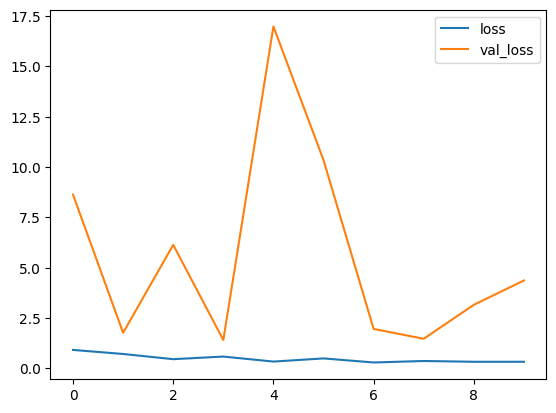

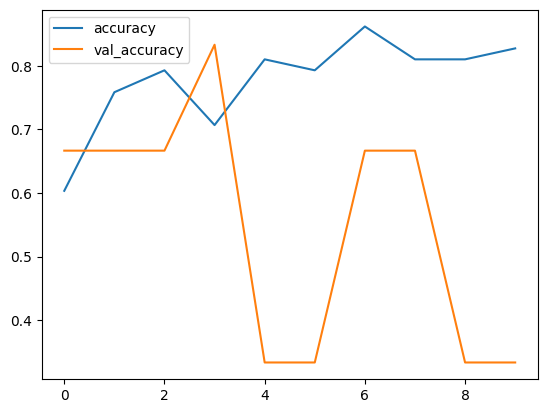

In [15]:

keras.utils.plot_model( 
	model, 
	show_shapes=True, 
	show_dtype=True, 
	show_layer_activations=True
) 
model.compile( 
	loss='binary_crossentropy', 
	optimizer='adam', 
	metrics=['accuracy'] 
) 
history = model.fit(train_datagen, 
          epochs=10, 
          validation_data=test_datagen) 

history_df = pd.DataFrame(history.history) 
history_df.loc[:, ['loss', 'val_loss']].plot() 
history_df.loc[:, ['accuracy', 'val_accuracy']].plot() 
plt.show() 


1/1 [==============================] - 0s 259ms/step
Dog


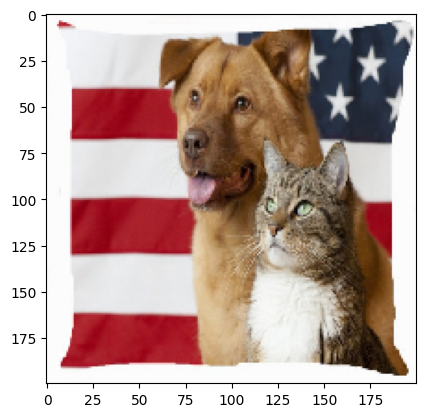

In [16]:

from tensorflow.keras.preprocessing import image 

#Input image 
test_image = image.load_img(r'D:\learn\python\learn_ml\dog_cat\input\train_frames\train\dog\dog002.png',target_size=(200,200)) 

#For show image 
plt.imshow(test_image) 
test_image = image.img_to_array(test_image) 
test_image = np.expand_dims(test_image,axis=0) 

# Result array 
result = model.predict(test_image) 

#Mapping result array with the main name list 
i=0
if(result>=0.5): 
    print("Dog") 
else: 
    print("Cat")
